<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
!curl -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

curl: Remote file name has no length!
curl: try 'curl --help' or 'curl --manual' for more information
,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male
12,12,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
13,13,PAIDOFF,900,7,9/10/2016,9/16/2016,26,college,female
14,14,PAIDOFF,1000,7,9/10/2016,9/16/2016,27,High School or Below,male
15,15,PAIDOFF,800,15,9/10/2016,9/24/2016,2

274,274,PAIDOFF,1000,30,9/14/2016,10/13/2016,30,Bechalor,male
275,275,PAIDOFF,800,15,9/14/2016,9/28/2016,44,college,male
276,276,PAIDOFF,800,15,9/14/2016,9/28/2016,37,High School or Below,male
277,277,PAIDOFF,1000,30,9/14/2016,10/13/2016,31,college,male
278,278,PAIDOFF,800,15,9/14/2016,9/28/2016,36,college,male
279,279,PAIDOFF,800,30,9/14/2016,10/13/2016,31,college,male
280,280,PAIDOFF,800,15,9/14/2016,9/28/2016,42,High School or Below,male
281,281,PAIDOFF,1000,15,9/14/2016,9/28/2016,28,Bechalor,male
282,282,PAIDOFF,1000,30,9/14/2016,10/13/2016,30,college,male
283,283,PAIDOFF,1000,30,9/14/2016,10/13/2016,30,High School or Below,male
284,284,PAIDOFF,1000,15,9/14/2016,9/28/2016,24,Bechalor,male
285,285,PAIDOFF,1000,30,9/14/2016,11/12/2016,34,Bechalor,male
286,286,PAIDOFF,1000,30,9/14/2016,10/13/2016,29,college,male
288,288,PAIDOFF,1000,30,9/14/2016,10/13/2016,34,Bechalor,male
289,289,PAIDOFF,800,15,9/14/2016,9/28/2016,28,High School or Below,male
290,290,PAIDOFF,1000,15,9/14/2016,9/28/20

### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()


FileNotFoundError: [Errno 2] File b'loan_train.csv' does not exist: b'loan_train.csv'

In [ ]:
! sudo pip3 install wget

In [13]:
df.shape

NameError: name 'df' is not defined

### Convert to date time object 

In [17]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

NameError: name 'df' is not defined

# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [18]:
df['loan_status'].value_counts()

NameError: name 'df' is not defined

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [19]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /Users/admin/anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.27 |                0         131 KB  anaconda
    certifi-2019.11.28         |           py37_0         156 KB  anaconda
    openssl-1.1.1              |       h1de35cc_0         4.6 MB  anaconda
    seaborn-0.9.0              |     pyh91ea838_1         164 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2019.9.1~ --> anaconda::ca-certificates-2019.11.27-0
  certifi             conda-forge::certifi-2019.9.11-py37_0 --> anaconda::certifi-2019.11.28-py37_0
  openssl            conda-forge::openssl-1.1

In [77]:
! pip install pydotplus

     |████████████████████████████████| 286kB 19.0MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


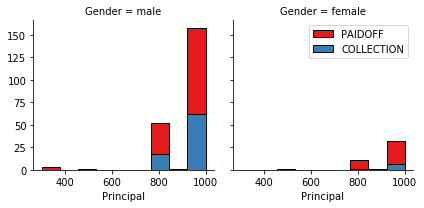

In [214]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

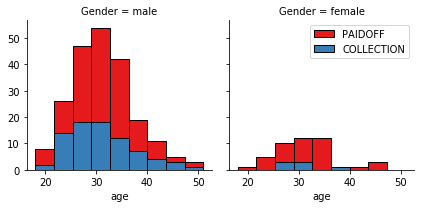

In [215]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

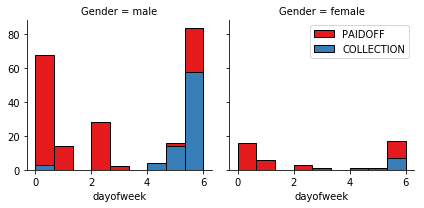

In [216]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [217]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [218]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [219]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [220]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [221]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [222]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [223]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [224]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [225]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [226]:
# Here we will try to examine what is the best number of classifiers, and what our model will predict
from sklearn.model_selection import train_test_split

In [227]:
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_m1.shape,  y_train_m1.shape)
print ('Test set:', X_test_m1.shape,  y_test_m1.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [229]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_m1,y_train_m1)
    yhat_m1=neigh.predict(X_test_m1)
    mean_acc[n-1] = metrics.accuracy_score(y_test_m1, yhat_m1)

    
    std_acc[n-1]=np.std(yhat_m1==y_test_m1)/np.sqrt(yhat_m1.shape[0])

#as we can see the best number of classifiers is 7
best_cl_knn=np.argmax(mean_acc)+1

print( "The best accuracy was with", mean_acc.max(), "with k=", best_cl_knn)

The best accuracy was with 0.7857142857142857 with k= 7


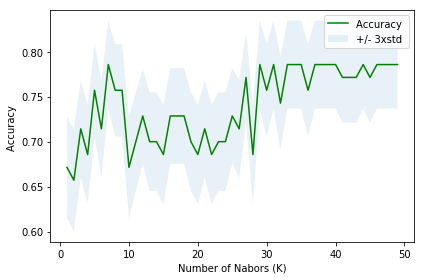

In [230]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [231]:
k=best_cl_knn
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_m1,y_train_m1)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [232]:
yhat_m1 = neigh.predict(X_test_m1)
yhat_m1[0:5]
yhat2_m1 = pd.DataFrame(neigh.predict(X))
df['model_pred']=yhat2_m1
df["model_pred"].value_counts()
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [233]:
#here we will evaluate our model by 3 metrics – Jaccard index, F1-score, LogLoass
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

model_1_jac=jaccard_similarity_score(y_test_m1, yhat_m1)
model_1_f1=f1_score(y_test_m1, yhat_m1, average='weighted')
# log loss not applicable for Knn – https://medium.com/@bengikoseoglu/why-log-loss-metric-shouldnt-be-used-to-evaluate-nearest-neighbour-classification-1fe314f460a2

# Decision Tree

In [257]:
from sklearn.tree import DecisionTreeClassifier

In [258]:
X_trainset_m2, X_testset_m2, y_trainset_m2, y_testset_m2 = train_test_split(X, y, test_size=0.3, random_state=3)

In [259]:
Kt = 15
meanTree_acc = np.zeros((Kt-1))
stdTree_acc = np.zeros((Kt-1))
for n in range(1,Kt):
    #Train Model and Predict  
    loanTree = DecisionTreeClassifier(criterion = "entropy", max_depth = n).fit(X_trainset_m2,y_trainset_m2)
    yhatTree=loanTree.predict(X_testset_m2)
    meanTree_acc[n-1] = metrics.accuracy_score(y_testset_m2, yhatTree)   
    stdTree_acc[n-1]=np.std(yhatTree==y_testset_m2)/np.sqrt(yhatTree.shape[0])

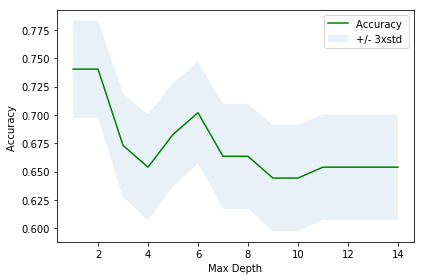

The best accuracy for Decision Tree was with 0.7403846153846154


In [260]:
plt.plot(range(1,Kt),meanTree_acc,'g')
plt.fill_between(range(1,Kt),meanTree_acc - 1 * stdTree_acc,meanTree_acc + 1 * stdTree_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth')
plt.tight_layout()
plt.show()
print( "The best accuracy for Decision Tree was with", meanTree_acc.max()) 

In [261]:
loanTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3).fit(X_trainset_m2,y_trainset_m2)
predTree = loanTree.predict(X_testset_m2)

model_2_jac=jaccard_similarity_score(y_testset_m2, predTree)
model_2_f1=f1_score(y_testset_m2, predTree, average='weighted')
model_2_jac

0.6730769230769231

In [262]:
print (predTree [0:5])
print (y_testset_m2 [0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']


In [263]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

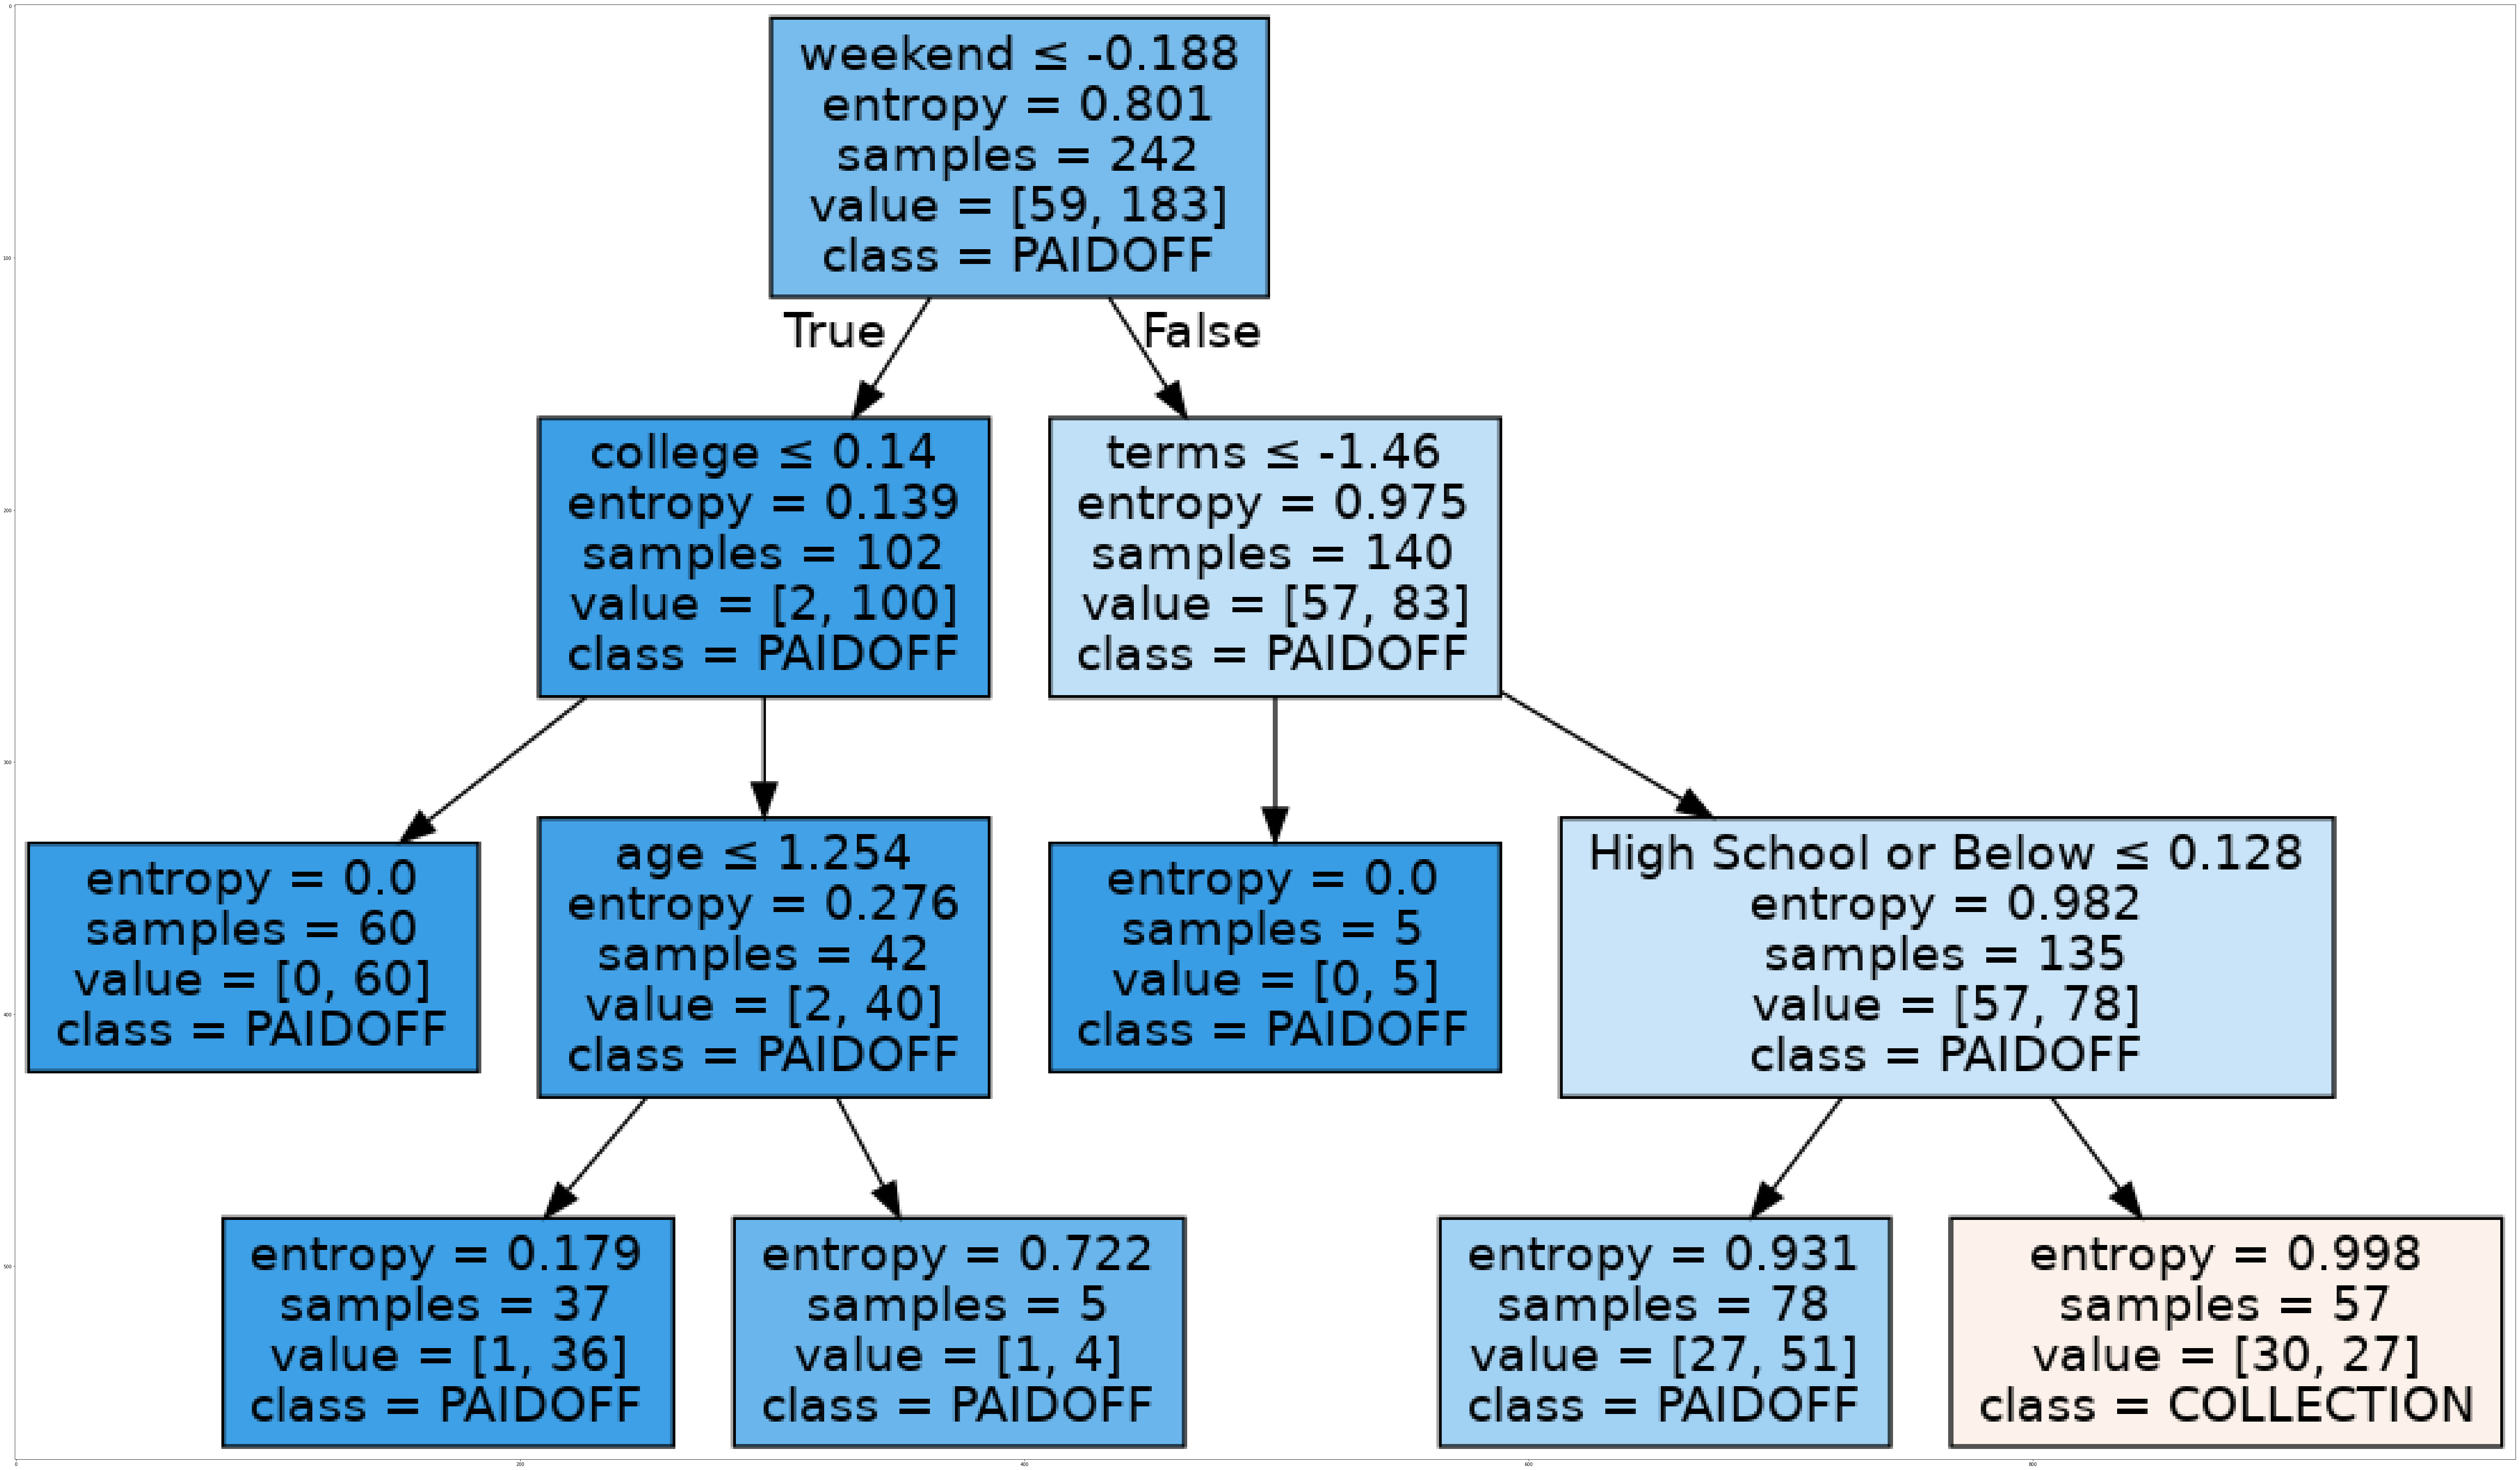

In [264]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
loanTree_optimal = DecisionTreeClassifier(criterion = "entropy", max_depth = 3).fit(X_trainset_m2,y_trainset_m2)
dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature.columns
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(loanTree_optimal,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset_m2), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [265]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import svm

X_train_m3, X_test_m3, y_train_m3, y_test_m3 = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_m3.shape,  y_train_m3.shape)
print ('Test set:', X_test_m3.shape,  y_test_m3.shape)

clf = svm.SVC(kernel='rbf')
clf.fit(X_train_m3, y_train_m3) 

yhat_m3 = clf.predict(X_test_m3)


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [266]:
model_3_jac=jaccard_similarity_score(y_test_m3, yhat_m3)
model_3_f1=f1_score(y_test_m3, yhat_m3, average='weighted') 


# Logistic Regression

In [267]:
X_train_m4, X_test_m4, y_train_m4, y_test_m4 = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_m4.shape,  y_train_m4.shape)
print ('Test set:', X_test_m4.shape,  y_test_m4.shape)

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_m4,y_train_m4)
LR

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [268]:
yhat_m4 = LR.predict(X_test_m4)

In [269]:
yhat_prob_m4 = LR.predict_proba(X_test_m4)

In [270]:
from sklearn.metrics import log_loss

model_4_jac=jaccard_similarity_score(y_test_m4, yhat_m4)
model_4_f1=f1_score(y_test_m4, yhat_m4, average='weighted') 
model_4_logloss=log_loss(y_test_m4, yhat_prob_m4)

# Final report (part 1)

In [271]:
Jaccard_p1 = [model_1_jac, model_2_jac, model_3_jac, model_4_jac]
f1_p1 = [model_1_f1, model_2_f1, model_3_f1, model_4_f1]

knn_logloss, predTree_logloss, svm_logloss = "NA","NA","NA"
logloss_p1 = [knn_logloss, predTree_logloss, svm_logloss, model_4_logloss]

# This is the report for all analysis I have done above with the test set which was generated from train_test_split in each section
Report1 = pd.DataFrame( index= ["KNN", "Decision Tree", "SVM", "LogisticRegression"])
Report1["Jaccard"] = Jaccard_p1 
Report1["F1-score"] = f1_p1
Report1["LogLoss"] = logloss_p1
Report1

,Jaccard,F1-score,LogLoss
KNN,0.785714,0.776654,NA
Decision Tree,0.673077,0.668886,NA
SVM,0.742857,0.727588,NA
LogisticRegression,0.685714,0.667052,0.577229


In [278]:
print("Here Knn method was the best (Jaccard and F1-Score) with 0,7812 average accuracy")

Here Knn method was the best (Jaccard and F1-Score) with 0,7812 average accuracy


# Model Evaluation using Test set (part2)

First, download and load the test set:

In [272]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-10-27 14:37:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-10-27 14:37:12 (413 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [273]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [274]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X_fin_test = Feature
y_fin_test = test_df['loan_status'].values
X_fin_test = preprocessing.StandardScaler().fit(X_fin_test).transform(X_fin_test)


# We have already trained our models in part, so here I'll just use those models for modelling loan_status for a new test set

#knn
yhat_knn = neigh.predict(X_fin_test)
#decision tree
yhat_predTree = drugTree.predict(X_fin_test)
#svm
yhat_svm = clf.predict(X_fin_test)
#log regression
yhat_logreg = LR.predict(X_fin_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [276]:
knn_jac = jaccard_similarity_score(y_fin_test, yhat_knn)
predTree_jac = jaccard_similarity_score(y_fin_test, yhat_predTree)
svm_jac = jaccard_similarity_score(y_fin_test, yhat_svm)
logreg_jac = jaccard_similarity_score(y_fin_test, yhat_logreg)
Jaccard = [knn_jac, predTree_jac, svm_jac, logreg_jac]

knn_f1 = f1_score(y_fin_test, yhat_knn,average='weighted')
predTree_f1 = f1_score(y_fin_test, yhat_predTree, average='weighted')
svm_f1 = f1_score(y_fin_test, yhat_svm, average='weighted')
logreg_f1 = f1_score(y_fin_test, yhat_logreg, average='weighted')
f1 = [knn_f1, predTree_f1, svm_f1, logreg_f1]

knn_logloss, predTree_logloss, svm_logloss = "NA","NA","NA"
logreg_logloss_prob = LR.predict_proba(X_fin_test)
logreg_logloss=log_loss(y_fin_test, logreg_logloss_prob)
logloss = [knn_logloss, predTree_logloss, svm_logloss, logreg_logloss]

Report2 = pd.DataFrame( index= ["KNN", "Decision Tree", "SVM", "LogisticRegression"])
Report2["Jaccard"] = Jaccard 
Report2["F1-score"] = f1
Report2["LogLoss"] = logloss
Report2

,Jaccard,F1-score,LogLoss
KNN,0.666667,0.632840,NA
Decision Tree,0.777778,0.782336,NA
SVM,0.796296,0.758350,NA
LogisticRegression,0.740741,0.660427,0.567215


In [279]:
print("The best one appers to be decision tree with average accuracy (Jaccard and F1-Score) 0.7801 !")

The best one appers to be deciion tree with average accuracy (Jaccard and F1-Score) 0.7801 !


In [1]:
! git init .

Initialized empty Git repository in /Users/admin/Desktop/Machine learning/Coursera/.git/


In [3]:
! git add .

In [5]:
! git commit -m 'первичная загрузка без подробных комментариев и с некоторыми недочетами'

[master (root-commit) 119c578] первичная загрузка без подробных комментариев и с некоторыми недочетами
 Committer: Emil Yusifov <admin@Emils-MacBook-Air.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 37 files changed, 39084 insertions(+)
 create mode 100644 .ipynb_checkpoints/Emil_Yusifov_Final_Project-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/Final_project-Loan-answer-py-v1-checkpoint.ipynb
 create mode 100644 Coursera | Online Courses From Top Universities. Join for Free.pdf
 create mode 100644 Emil_Yusifov_Final_Project.ipynb
 create mode 100644 Final_project-Loan-answer-py-v1.ipy

In [ ]:
! git push -u https://github.com/emil2397/ml_methods

In [ ]:
! git push -u https://github.com/emil2397/ml_methods.git

Username for 'https://github.com': 

In [ ]:
! git push -u git@github.com:emil2397/ml_methods.git

In [ ]:
! git remote add origin git@github.com:emil2397/ml_methods.git

In [ ]:
git add README.md




In [1]:
! git init

Reinitialized existing Git repository in /Users/admin/Desktop/Machine learning/Coursera/.git/


In [2]:
! git commit -m "first commit"

On branch master
Changes not staged for commit:
	modified:   Emil_Yusifov_Final_Project.ipynb

no changes added to commit


In [3]:
! git remote add origin https://github.com/emil2397/ml_methods.git

fatal: remote origin already exists.


In [6]:
! git remote add origin git@github.com:emil2397/ml_methods.git

fatal: remote origin already exists.


In [ ]:
! git push -u origin master

Username for 'https://github.com': 

In [ ]:
! emil2397